In [1]:
import nltk
import pandas as pd
import numpy as np
import re
import gensim
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk import ngrams
from nltk import bigrams
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk.stem.porter import PorterStemmer
from nltk.collocations import BigramCollocationFinder
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 

###Sentiment-Analysis
from nltk.classify import SklearnClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *


from nltk.chunk import *
from nltk.chunk.util import *
from nltk.chunk.regexp import *
from nltk import Tree
from nltk.tokenize import PunktSentenceTokenizer


from sklearn.model_selection import cross_val_score

C:\Users\HP\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
ps = PorterStemmer() #word roots

In [3]:
comments = pd.read_csv('reviews.csv')
comments.insert(3,'labelSentiment',"")
comments.insert(4,'sentimentGuess',"")
stopWords = stopwords.words("english")

stopWords.append("lot")
stopWords.append("would")
stopWords.append("much")

In [4]:
sentList = []
for s in range(1000):

        comment = re.sub('[^a-zA-z]',' ',comments['Review'][s])#clean inputs except a-z

        comment = comment.lower()

        comment = comment.lower().split()
        
        
        commentS = " ".join(comment)
        
        sentList.append(commentS)

In [5]:
def preprocess(comment):



    cleanWords = []

  

    for i in range(1000):

        comment = re.sub('[^a-zA-z]',' ',comments['Review'][i])#clean inputs except a-z
        
        comment = comment.lower()

        comment = comment.lower().split()
        
        cleanWords.append(comment)

        

    result = [] 

    for i in cleanWords:

        for words in i:

            if words not in stopWords:

                result.append(words)

    

    stems = []

        

    for j in result:

        stems.append(ps.stem(j))

        

    return result, stems

In [6]:
def mostFrequent(frame, count):

    return frame.most_common(count) 

In [7]:
def displayNgrams(df, n):
    ngram = nltk.ngrams(df,n)
    for i in ngram:
        print(i)
    return ngram

In [8]:
def mostFreqBiagram(data ,frequency, n):

    set = []

    for i in dist.most_common(len(data)):

        if(i[1]>=frequency):

            set.append(i)

    ret = []

    sa = displayNgrams(set, 2)

    

    result = []

    count = 0

    for i in sa:

        if(count==n):

            break

        result.append(i)

        count += 1

    return result



In [9]:
def topTen(data):

    bigram_measures = nltk.collocations.BigramAssocMeasures()

    trigram_measures = nltk.collocations.TrigramAssocMeasures()

    finder = BigramCollocationFinder.from_words(data)

    return finder.nbest(bigram_measures.pmi, 10)

In [10]:
def score_bi_gram(bi_gram):
    bi_gram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_documents(bi_gram)
    finder.apply_freq_filter(2)
    scored = finder.score_ngrams(bi_gram_measures.pmi)
    return scored

In [11]:
def tag_given_text(text):

    text = nltk.word_tokenize(text)

    return nltk.pos_tag(text)

In [12]:
def num_of_tags(tagged_text):

    stat = {}

    for x in tagged_text:

        if x[1] in stat:

            stat[x[1]] += 1

        else:

            stat[x[1]] = 1

    return sorted(stat.items(), key=lambda x: x[1], reverse=True)[:10]

In [13]:
def get_specified_tag(tagged_text, tag):

    define_text = list()

    for k, v in tagged_text:

        if tag in v:

            define_text.append(k)

    return define_text


In [14]:
dataList, stemList = preprocess(comments)

In [15]:
dist = FreqDist(dataList)

In [16]:
lemmatizer = WordNetLemmatizer() 
lemma = []

for q in range(len(dataList)):
    lm = lemmatizer.lemmatize(dataList[q])
    lemma.append(lm)

In [17]:
print("\n\n===============Dist.most_common===============")

print(dist.most_common(10))



===============Dist.most_common===============
[('course', 757), ('great', 240), ('good', 174), ('really', 141), ('excellent', 95), ('interesting', 94), ('printing', 89), ('well', 82), ('like', 81), ('thank', 77)]


In [18]:
frequentList = mostFrequent(dist,10)

In [19]:
print("\n\n===============frequentList===============")

print(frequentList) 



===============frequentList===============
[('course', 757), ('great', 240), ('good', 174), ('really', 141), ('excellent', 95), ('interesting', 94), ('printing', 89), ('well', 82), ('like', 81), ('thank', 77)]


In [20]:
print("\n\n===============pairList===============")

pairList = displayNgrams(dataList, 2)

print(pairList)



===============pairList===============
('good', 'interesting')
('interesting', 'class')
('class', 'helpful')
('helpful', 'currently')
('currently', 'still')
('still', 'learning')
('learning', 'class')
('class', 'makes')
('makes', 'basic')
('basic', 'music')
('music', 'knowledge')
('knowledge', 'like')
('like', 'prof')
('prof', 'tas')
('tas', 'helpful')
('helpful', 'discussion')
('discussion', 'among')
('among', 'students')
('students', 'quite')
('quite', 'active')
('active', 'rewarding')
('rewarding', 'learning')
('learning', 'experience')
('experience', 'easy')
('easy', 'follow')
('follow', 'includes')
('includes', 'basic')
('basic', 'important')
('important', 'techniques')
('techniques', 'use')
('use', 'sketchup')
('sketchup', 'really')
('really', 'nice')
('nice', 'teacher')
('teacher', 'could')
('could', 'got')
('got', 'point')
('point', 'eazliy')
('eazliy', 'v')
('v', 'great')
('great', 'course')
('course', 'recommend')
('recommend', 'especially')
('especially', 'business')
('bus

('point', 'start')
('start', 'printing')
('printing', 'information')
('information', 'links')
('links', 'interviews')
('interviews', 'easy')
('easy', 'understand')
('understand', 'keep')
('keep', 'good')
('good', 'work')
('work', 'useful')
('useful', 'understanding')
('understanding', 'basics')
('basics', 'printing')
('printing', 'technology')
('technology', 'fantastic')
('fantastic', 'course')
('course', 'even')
('even', 'never')
('never', 'heard')
('heard', 'printing')
('printing', 'using')
('using', 'printer')
('printer', 'highly')
('highly', 'recommend')
('recommend', 'anyone')
('anyone', 'interested')
('interested', 'technology')
('technology', 'futuristic')
('futuristic', 'concepts')
('concepts', 'videos')
('videos', 'course')
('course', 'engaging')
('engaging', 'plethora')
('plethora', 'interviews')
('interviews', 'people')
('people', 'involved')
('involved', 'printing')
('printing', 'industry')
('industry', 'discuss')
('discuss', 'specific')
('specific', 'topics')
('topics', 'p

('education', 'teaching')
('teaching', 'work')
('work', 'experience')
('experience', 'believe')
('believe', 'professor')
('professor', 'educator')
('educator', 'designed')
('designed', 'presented')
('presented', 'course')
('course', 'requires')
('requires', 'atleast')
('atleast', 'basic')
('basic', 'training')
('training', 'putting')
('putting', 'together')
('together', 'important')
('important', 'course')
('course', 'like')
('like', 'accounting')
('accounting', 'analytics')
('analytics', 'far')
('far', 'subject')
('subject', 'course')
('course', 'instructor')
('instructor', 'great')
('great', 'missed')
('missed', 'referenced')
('referenced', 'material')
('material', 'thanks')
('thanks', 'professor')
('professor', 'brian')
('brian', 'bushee')
('bushee', 'good')
('good', 'explanations')
('explanations', 'learned')
('learned', 'find')
('find', 'module')
('module', 'difficult')
('difficult', 'prof')
('prof', 'christopher')
('christopher', 'ittner')
('ittner', 'speaking')
('speaking', 'lik

('point', 'seek')
('seek', 'expand')
('expand', 'music')
('music', 'creation')
('creation', 'toolset')
('toolset', 'great')
('great', 'fun')
('fun', 'easy')
('easy', 'learn')
('learn', 'personally')
('personally', 'think')
('think', 'learnt')
('learnt', 'google')
('google', 'youtube')
('youtube', 'course')
('course', 'join')
('join', 'course')
('course', 'certification')
('certification', 'certificate')
('certificate', 'find')
('find', 'course')
('course', 'value')
('value', 'course')
('course', 'gives')
('gives', 'good')
('good', 'basic')
('basic', 'overview')
('overview', 'softwareas')
('softwareas', 'newbie')
('newbie', 'daw')
('daw', 'software')
('software', 'helpsactually')
('helpsactually', 'needed')
('needed', 'determine')
('determine', 'going')
('going', 'purchase')
('purchase', 'full')
('full', 'versioni')
('versioni', 'offers')
('offers', 'nice')
('nice', 'introduction')
('introduction', 'ableton')
('ableton', 'usage')
('usage', 'however')
('however', 'lovely')
('lovely', 'lo

('last', 'one')
('one', 'depth')
('depth', 'great')
('great', 'course')
('course', 'good')
('good', 'pace')
('pace', 'excellent')
('excellent', 'course')
('course', 'make')
('make', 'courses')
('courses', 'like')
('like', 'really')
('really', 'amazing')
('amazing', 'experience')
('experience', 'wonderful')
('wonderful', 'course')
('course', 'knowledge')
('knowledge', 'learn')
('learn', 'facilitations')
('facilitations', 'make')
('make', 'studying')
('studying', 'process')
('process', 'interesting')
('interesting', 'thanks')
('thanks', 'efforts')
('efforts', 'enthusiastic')
('enthusiastic', 'visit')
('visit', 'leiden')
('leiden', 'medical')
('medical', 'school')
('school', 'center')
('center', 'one')
('one', 'day')
('day', '^_^')
('^_^', 'continue')
('continue', 'learn')
('learn', 'great')
('great', 'medical')
('medical', 'staff')
('staff', 'loved')
('loved', 'course')
('course', 'teaching')
('teaching', 'anatomy')
('anatomy', 'physical')
('physical', 'therapist')
('therapist', 'student

('great', 'quite')
('quite', 'interesting')
('interesting', 'may')
('may', 'deep')
('deep', 'enough')
('enough', 'great')
('great', 'course')
('course', 'nevertheless')
('nevertheless', 'full')
('full', 'new')
('new', 'information')
('information', 'agile')
('agile', 'planning')
('planning', 'great')
('great', 'course')
('course', 'robust')
('robust', 'course')
('course', 'sequence')
('sequence', 'well')
('well', 'designed')
('designed', 'clear')
('clear', 'teaches')
('teaches', 'useful')
('useful', 'material')
('material', 'effectively')
('effectively', 'fun')
('fun', 'take')
('take', 'easy')
('easy', 'understand')
('understand', 'think')
('think', 'estimation')
('estimation', 'methods')
('methods', 'really')
('really', 'realistic')
('realistic', 'great')
('great', 'course')
('course', 'another')
('another', 'great')
('great', 'course')
('course', 'specialization')
('specialization', 'great')
('great', 'instructors')
('instructors', 'passionate')
('passionate', 'truly')
('truly', 'mak

('keyboards', 'zero')
('zero', 'need')
('need', 'watch')
('watch', 'lectures')
('lectures', 'least')
('least', 'first')
('first', 'weeks')
('weeks', 'lectures')
('lectures', 'terrible')
('terrible', 'english')
('english', 'beyond')
('beyond', 'horrible')
('horrible', 'understand')
('understand', 'modern')
('modern', 'culture')
('culture', 'teachers')
('teachers', 'teach')
('teach', 'languages')
('languages', 'speak')
('speak', 'purely')
('purely', 'reading')
('reading', 'slides')
('slides', 'case')
('case', 'word')
('word', 'word')
('word', 'learned')
('learned', 'basics')
('basics', 'neuroscience')
('neuroscience', 'minutes')
('minutes', 'lecture')
('lecture', 'separate')
('separate', 'course')
('course', 'computational')
('computational', 'neuroscience')
('neuroscience', 'entire')
('entire', 'first')
('first', 'week')
('week', 'actually')
('actually', 'want')
('want', 'learn')
('learn', 'neuroscience')
('neuroscience', 'check')
('check', 'hardvardx')
('hardvardx', 'intro')
('intro', 

('forward', 'starting')
('starting', 'course')
('course', 'well')
('well', 'designed')
('designed', 'good')
('good', 'refresh')
('refresh', 'basics')
('basics', 'many')
('many', 'top')
('top', 'algorithms')
('algorithms', 'useful')
('useful', 'course')
('course', 'loved')
('loved', 'course')
('course', 'relatively')
('relatively', 'instructions')
('instructions', 'homework')
('homework', 'believe')
('believe', 'test')
('test', 'cases')
('cases', 'better')
('better', 'though')
('though', 'able')
('able', 'found')
('found', 'forum')
('forum', 'besides')
('besides', 'lecture')
('lecture', 'really')
('really', 'awesome')
('awesome', 'thanks')
('thanks', 'good')
('good', 'course')
('course', 'algorithms')
('algorithms', 'bought')
('bought', 'book')
('book', 'help')
('help', 'understand')
('understand', 'lectures')
('lectures', 'make')
('make', 'way')
('way', 'easier')
('easier', 'thus')
('thus', 'fun')
('fun', 'understand')
('understand', 'analysis')
('analysis', 'looking')
('looking', 'for

In [21]:
print("\n\n===============mostFreqList===============")

mostFreqList = mostFreqBiagram(dataList,2,5)

print(mostFreqList) 



===============mostFreqList===============
(('course', 757), ('great', 240))
(('great', 240), ('good', 174))
(('good', 174), ('really', 141))
(('really', 141), ('excellent', 95))
(('excellent', 95), ('interesting', 94))
(('interesting', 94), ('printing', 89))
(('printing', 89), ('well', 82))
(('well', 82), ('like', 81))
(('like', 81), ('thank', 77))
(('thank', 77), ('one', 69))
(('one', 69), ('understand', 69))
(('understand', 69), ('easy', 65))
(('easy', 65), ('useful', 64))
(('useful', 64), ('material', 64))
(('material', 64), ('learn', 64))
(('learn', 64), ('learned', 63))
(('learned', 63), ('ableton', 63))
(('ableton', 63), ('time', 62))
(('time', 62), ('week', 60))
(('week', 60), ('accounting', 58))
(('accounting', 58), ('class', 56))
(('class', 56), ('courses', 55))
(('courses', 55), ('thanks', 55))
(('thanks', 55), ('videos', 54))
(('videos', 54), ('also', 54))
(('also', 54), ('students', 53))
(('students', 53), ('information', 53))
(('information', 53), ('content', 52))
(('co

In [22]:
topTenList = topTen(dataList)

print("\n\n===============topTenList===============")

print(topTenList)



===============topTenList===============
[('aaha', 'moments'), ('accents', 'mildly'), ('accomplishments', 'prompting'), ('accountant', 'gene'), ('accountants', 'segments'), ('acct', 'wasting'), ('achieved', 'hi'), ('address', 'exist'), ('adquiridos', 'espero'), ('advise', 'forces')]


In [23]:
topList = score_bi_gram(preprocess(comments))

print("\n\n---------------topList---------------")

print(topList) 



---------------topList---------------
[(('australia', 'partnership'), 13.769527953167314), (('bara', 'pest'), 13.769527953167314), (('benford', 'law'), 13.769527953167314), (('bill', 'clark'), 13.769527953167314), (('bought', 'book'), 13.769527953167314), (('callow', 'youth'), 13.769527953167314), (('clever', 'wise'), 13.769527953167314), (('cnn', 'journalist'), 13.769527953167314), (('combat', 'adv'), 13.769527953167314), (('credit', 'card'), 13.769527953167314), (('crtl', 'f'), 13.769527953167314), (('cutting', 'edge'), 13.769527953167314), (('duct', 'quail'), 13.769527953167314), (('earth', 'joke'), 13.769527953167314), (('elaborar', 'una'), 13.769527953167314), (('england', 'turkey'), 13.769527953167314), (('espero', 'piensen'), 13.769527953167314), (('feet', 'wet'), 13.769527953167314), (('feilernov', 'pstchat'), 13.769527953167314), (('greek', 'letter'), 13.769527953167314), (('guayaquil', 'ecuador'), 13.769527953167314), (('gun', 'control'), 13.769527953167314), (('iam', 'sooo

In [24]:
print("\n\n---------------myString---------------")
myString = " ".join(dataList)
print(myString)



---------------myString---------------
good interesting class helpful currently still learning class makes basic music knowledge like prof tas helpful discussion among students quite active rewarding learning experience easy follow includes basic important techniques use sketchup really nice teacher could got point eazliy v great course recommend especially business managers one useful course management disappointed name misleading course provides good introduction overview responsibilities cto little specifically digital content deals two speed single short lecture course treatment superficial easy find depth material freely available mckinsey website example super content definitely course one excellent courses coursera information technology bosses managers reason apply course bcg content pretty unique includes high level analysis wide range knowledge needed cover detailed aspects best regards oleg serov excellent course teachers congratulations good course cio non technical compa

In [25]:
lastStr = []

for ii in dataList:
    if ii not in lastStr:
        lastStr.append(ii)

print(lastStr)

lastString = " ".join(lastStr)
print(lastString)


tokens=nltk.word_tokenize(lastString)
print(tokens)

POS = nltk.pos_tag(tokens)
print(POS)


['good', 'interesting', 'class', 'helpful', 'currently', 'still', 'learning', 'makes', 'basic', 'music', 'knowledge', 'like', 'prof', 'tas', 'discussion', 'among', 'students', 'quite', 'active', 'rewarding', 'experience', 'easy', 'follow', 'includes', 'important', 'techniques', 'use', 'sketchup', 'really', 'nice', 'teacher', 'could', 'got', 'point', 'eazliy', 'v', 'great', 'course', 'recommend', 'especially', 'business', 'managers', 'one', 'useful', 'management', 'disappointed', 'name', 'misleading', 'provides', 'introduction', 'overview', 'responsibilities', 'cto', 'little', 'specifically', 'digital', 'content', 'deals', 'two', 'speed', 'single', 'short', 'lecture', 'treatment', 'superficial', 'find', 'depth', 'material', 'freely', 'available', 'mckinsey', 'website', 'example', 'super', 'definitely', 'excellent', 'courses', 'coursera', 'information', 'technology', 'bosses', 'reason', 'apply', 'bcg', 'pretty', 'unique', 'high', 'level', 'analysis', 'wide', 'range', 'needed', 'cover', '

[('good', 'JJ'), ('interesting', 'JJ'), ('class', 'NN'), ('helpful', 'NN'), ('currently', 'RB'), ('still', 'RB'), ('learning', 'VBG'), ('makes', 'VBZ'), ('basic', 'JJ'), ('music', 'NN'), ('knowledge', 'NN'), ('like', 'IN'), ('prof', 'NN'), ('tas', 'NNS'), ('discussion', 'NN'), ('among', 'IN'), ('students', 'NNS'), ('quite', 'RB'), ('active', 'JJ'), ('rewarding', 'VBG'), ('experience', 'NN'), ('easy', 'JJ'), ('follow', 'JJ'), ('includes', 'VBZ'), ('important', 'JJ'), ('techniques', 'NNS'), ('use', 'VBP'), ('sketchup', 'JJ'), ('really', 'RB'), ('nice', 'JJ'), ('teacher', 'NN'), ('could', 'MD'), ('got', 'VB'), ('point', 'JJ'), ('eazliy', 'NN'), ('v', 'NN'), ('great', 'JJ'), ('course', 'NN'), ('recommend', 'VBP'), ('especially', 'RB'), ('business', 'NN'), ('managers', 'NNS'), ('one', 'CD'), ('useful', 'JJ'), ('management', 'NN'), ('disappointed', 'JJ'), ('name', 'NN'), ('misleading', 'VBG'), ('provides', 'VBZ'), ('introduction', 'NN'), ('overview', 'NN'), ('responsibilities', 'NNS'), ('cto

In [26]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
print("\n\n---------------tagged---------------")
print(tag_given_text(lastString))



---------------tagged---------------
[('good', 'JJ'), ('interesting', 'JJ'), ('class', 'NN'), ('helpful', 'NN'), ('currently', 'RB'), ('still', 'RB'), ('learning', 'VBG'), ('makes', 'VBZ'), ('basic', 'JJ'), ('music', 'NN'), ('knowledge', 'NN'), ('like', 'IN'), ('prof', 'NN'), ('tas', 'NNS'), ('discussion', 'NN'), ('among', 'IN'), ('students', 'NNS'), ('quite', 'RB'), ('active', 'JJ'), ('rewarding', 'VBG'), ('experience', 'NN'), ('easy', 'JJ'), ('follow', 'JJ'), ('includes', 'VBZ'), ('important', 'JJ'), ('techniques', 'NNS'), ('use', 'VBP'), ('sketchup', 'JJ'), ('really', 'RB'), ('nice', 'JJ'), ('teacher', 'NN'), ('could', 'MD'), ('got', 'VB'), ('point', 'JJ'), ('eazliy', 'NN'), ('v', 'NN'), ('great', 'JJ'), ('course', 'NN'), ('recommend', 'VBP'), ('especially', 'RB'), ('business', 'NN'), ('managers', 'NNS'), ('one', 'CD'), ('useful', 'JJ'), ('management', 'NN'), ('disappointed', 'JJ'), ('name', 'NN'), ('misleading', 'VBG'), ('provides', 'VBZ'), ('introduction', 'NN'), ('overview', 'N

In [28]:
numtag = num_of_tags(tag_given_text(lastString))

print("\n\n---------------numtag---------------")

print(numtag)



---------------numtag---------------
[('NN', 1006), ('JJ', 701), ('NNS', 442), ('VBG', 241), ('RB', 190), ('VBP', 177), ('VBD', 150), ('VBN', 109), ('VBZ', 59), ('IN', 39)]


In [29]:
print(get_specified_tag(tag_given_text(myString), 'NN'))

['class', 'helpful', 'class', 'music', 'knowledge', 'prof', 'tas', 'discussion', 'students', 'experience', 'techniques', 'teacher', 'eazliy', 'v', 'course', 'business', 'managers', 'course', 'management', 'name', 'course', 'introduction', 'overview', 'responsibilities', 'deals', 'speed', 'lecture', 'course', 'treatment', 'material', 'mckinsey', 'example', 'super', 'content', 'course', 'excellent', 'information', 'technology', 'managers', 'reason', 'course', 'bcg', 'content', 'level', 'analysis', 'range', 'knowledge', 'cover', 'aspects', 'regards', 'course', 'teachers', 'congratulations', 'course', 'cio', 'company', 'content', 'course', 'learn', 'content', 'term', 'material', 'approach', 'thank', 'program', 'demystifies', 'world', 'cios', 'corporation', 'coverage', 'introductory', 'participants', 'nuances', 'trends', 'course', 'participant', 'numbers', 'plan', 'reviews', 'reviews', 'variations', 'expectations', 'sections', 'subtitles', 'quality', 'review', 'course', 'course', 'anything'

In [30]:
print("\n\n---------------10---------------")

print(mostFrequent(FreqDist(dataList), len(dataList)))

data_ = mostFrequent(FreqDist(dataList), len(dataList))

print("\n\n---------------ZIP---------------")

last = zip(data_,numtag)
resultSet = set(last)
print(resultSet)



---------------10---------------
[('course', 757), ('great', 240), ('good', 174), ('really', 141), ('excellent', 95), ('interesting', 94), ('printing', 89), ('well', 82), ('like', 81), ('thank', 77), ('one', 69), ('understand', 69), ('easy', 65), ('useful', 64), ('material', 64), ('learn', 64), ('learned', 63), ('ableton', 63), ('time', 62), ('week', 60), ('accounting', 58), ('class', 56), ('courses', 55), ('thanks', 55), ('videos', 54), ('also', 54), ('students', 53), ('information', 53), ('content', 52), ('get', 51), ('think', 51), ('professor', 51), ('introduction', 49), ('first', 49), ('knowledge', 47), ('way', 46), ('best', 45), ('work', 44), ('lectures', 43), ('learning', 41), ('examples', 41), ('enjoyed', 41), ('recommend', 40), ('live', 40), ('clear', 39), ('experience', 38), ('new', 38), ('could', 37), ('people', 37), ('nice', 36), ('english', 36), ('questions', 36), ('many', 36), ('financial', 36), ('make', 35), ('even', 35), ('use', 34), ('business', 33), ('love', 32), ('a

In [31]:
print("\n\n---Difference words and stems----")

difWordStem = zip(dataList,stemList,lemma)
resultDif = set(difWordStem)
print(resultDif)



---Difference words and stems----
{('conceptual', 'conceptu', 'conceptual'), ('gratefulness', 'grate', 'gratefulness'), ('alivethanks', 'alivethank', 'alivethanks'), ('development', 'develop', 'development'), ('application', 'applic', 'application'), ('discreditation', 'discredit', 'discreditation'), ('algos', 'algo', 'algos'), ('industry', 'industri', 'industry'), ('hey', 'hey', 'hey'), ('assignment', 'assign', 'assignment'), ('surely', 'sure', 'surely'), ('shared', 'share', 'shared'), ('weeks', 'week', 'week'), ('produced', 'produc', 'produced'), ('idiomatic', 'idiomat', 'idiomatic'), ('response', 'respons', 'response'), ('across', 'across', 'across'), ('nicely', 'nice', 'nicely'), ('presented', 'present', 'presented'), ('classmates', 'classmat', 'classmate'), ('joke', 'joke', 'joke'), ('relaxing', 'relax', 'relaxing'), ('decided', 'decid', 'decided'), ('huge', 'huge', 'huge'), ('movement', 'movement', 'movement'), ('network', 'network', 'network'), ('software', 'softwar', 'softwar

In [32]:
for word, stem, lem in zip(dataList, stemList, lemma): 
    print ("WORD :  %s     STEM : %s    LEMMA : %s" %(word, stem, lem)) 

WORD :  good     STEM : good    LEMMA : good
WORD :  interesting     STEM : interest    LEMMA : interesting
WORD :  class     STEM : class    LEMMA : class
WORD :  helpful     STEM : help    LEMMA : helpful
WORD :  currently     STEM : current    LEMMA : currently
WORD :  still     STEM : still    LEMMA : still
WORD :  learning     STEM : learn    LEMMA : learning
WORD :  class     STEM : class    LEMMA : class
WORD :  makes     STEM : make    LEMMA : make
WORD :  basic     STEM : basic    LEMMA : basic
WORD :  music     STEM : music    LEMMA : music
WORD :  knowledge     STEM : knowledg    LEMMA : knowledge
WORD :  like     STEM : like    LEMMA : like
WORD :  prof     STEM : prof    LEMMA : prof
WORD :  tas     STEM : ta    LEMMA : ta
WORD :  helpful     STEM : help    LEMMA : helpful
WORD :  discussion     STEM : discuss    LEMMA : discussion
WORD :  among     STEM : among    LEMMA : among
WORD :  students     STEM : student    LEMMA : student
WORD :  quite     STEM : quit    LEMMA :

WORD :  printing     STEM : print    LEMMA : printing
WORD :  information     STEM : inform    LEMMA : information
WORD :  links     STEM : link    LEMMA : link
WORD :  interviews     STEM : interview    LEMMA : interview
WORD :  easy     STEM : easi    LEMMA : easy
WORD :  understand     STEM : understand    LEMMA : understand
WORD :  keep     STEM : keep    LEMMA : keep
WORD :  good     STEM : good    LEMMA : good
WORD :  work     STEM : work    LEMMA : work
WORD :  useful     STEM : use    LEMMA : useful
WORD :  understanding     STEM : understand    LEMMA : understanding
WORD :  basics     STEM : basic    LEMMA : basic
WORD :  printing     STEM : print    LEMMA : printing
WORD :  technology     STEM : technolog    LEMMA : technology
WORD :  fantastic     STEM : fantast    LEMMA : fantastic
WORD :  course     STEM : cours    LEMMA : course
WORD :  even     STEM : even    LEMMA : even
WORD :  never     STEM : never    LEMMA : never
WORD :  heard     STEM : heard    LEMMA : heard
WORD

WORD :  experience     STEM : experi    LEMMA : experience
WORD :  believe     STEM : believ    LEMMA : believe
WORD :  professor     STEM : professor    LEMMA : professor
WORD :  educator     STEM : educ    LEMMA : educator
WORD :  designed     STEM : design    LEMMA : designed
WORD :  presented     STEM : present    LEMMA : presented
WORD :  course     STEM : cours    LEMMA : course
WORD :  requires     STEM : requir    LEMMA : requires
WORD :  atleast     STEM : atleast    LEMMA : atleast
WORD :  basic     STEM : basic    LEMMA : basic
WORD :  training     STEM : train    LEMMA : training
WORD :  putting     STEM : put    LEMMA : putting
WORD :  together     STEM : togeth    LEMMA : together
WORD :  important     STEM : import    LEMMA : important
WORD :  course     STEM : cours    LEMMA : course
WORD :  like     STEM : like    LEMMA : like
WORD :  accounting     STEM : account    LEMMA : accounting
WORD :  analytics     STEM : analyt    LEMMA : analytics
WORD :  far     STEM : far 

WORD :  expand     STEM : expand    LEMMA : expand
WORD :  music     STEM : music    LEMMA : music
WORD :  creation     STEM : creation    LEMMA : creation
WORD :  toolset     STEM : toolset    LEMMA : toolset
WORD :  great     STEM : great    LEMMA : great
WORD :  fun     STEM : fun    LEMMA : fun
WORD :  easy     STEM : easi    LEMMA : easy
WORD :  learn     STEM : learn    LEMMA : learn
WORD :  personally     STEM : person    LEMMA : personally
WORD :  think     STEM : think    LEMMA : think
WORD :  learnt     STEM : learnt    LEMMA : learnt
WORD :  google     STEM : googl    LEMMA : google
WORD :  youtube     STEM : youtub    LEMMA : youtube
WORD :  course     STEM : cours    LEMMA : course
WORD :  join     STEM : join    LEMMA : join
WORD :  course     STEM : cours    LEMMA : course
WORD :  certification     STEM : certif    LEMMA : certification
WORD :  certificate     STEM : certif    LEMMA : certificate
WORD :  find     STEM : find    LEMMA : find
WORD :  course     STEM : cour

WORD :  great     STEM : great    LEMMA : great
WORD :  course     STEM : cours    LEMMA : course
WORD :  good     STEM : good    LEMMA : good
WORD :  pace     STEM : pace    LEMMA : pace
WORD :  excellent     STEM : excel    LEMMA : excellent
WORD :  course     STEM : cours    LEMMA : course
WORD :  make     STEM : make    LEMMA : make
WORD :  courses     STEM : cours    LEMMA : course
WORD :  like     STEM : like    LEMMA : like
WORD :  really     STEM : realli    LEMMA : really
WORD :  amazing     STEM : amaz    LEMMA : amazing
WORD :  experience     STEM : experi    LEMMA : experience
WORD :  wonderful     STEM : wonder    LEMMA : wonderful
WORD :  course     STEM : cours    LEMMA : course
WORD :  knowledge     STEM : knowledg    LEMMA : knowledge
WORD :  learn     STEM : learn    LEMMA : learn
WORD :  facilitations     STEM : facilit    LEMMA : facilitation
WORD :  make     STEM : make    LEMMA : make
WORD :  studying     STEM : studi    LEMMA : studying
WORD :  process     STEM :

WORD :  interesting     STEM : interest    LEMMA : interesting
WORD :  may     STEM : may    LEMMA : may
WORD :  deep     STEM : deep    LEMMA : deep
WORD :  enough     STEM : enough    LEMMA : enough
WORD :  great     STEM : great    LEMMA : great
WORD :  course     STEM : cours    LEMMA : course
WORD :  nevertheless     STEM : nevertheless    LEMMA : nevertheless
WORD :  full     STEM : full    LEMMA : full
WORD :  new     STEM : new    LEMMA : new
WORD :  information     STEM : inform    LEMMA : information
WORD :  agile     STEM : agil    LEMMA : agile
WORD :  planning     STEM : plan    LEMMA : planning
WORD :  great     STEM : great    LEMMA : great
WORD :  course     STEM : cours    LEMMA : course
WORD :  robust     STEM : robust    LEMMA : robust
WORD :  course     STEM : cours    LEMMA : course
WORD :  sequence     STEM : sequenc    LEMMA : sequence
WORD :  well     STEM : well    LEMMA : well
WORD :  designed     STEM : design    LEMMA : designed
WORD :  clear     STEM : clea

WORD :  watch     STEM : watch    LEMMA : watch
WORD :  lectures     STEM : lectur    LEMMA : lecture
WORD :  least     STEM : least    LEMMA : least
WORD :  first     STEM : first    LEMMA : first
WORD :  weeks     STEM : week    LEMMA : week
WORD :  lectures     STEM : lectur    LEMMA : lecture
WORD :  terrible     STEM : terribl    LEMMA : terrible
WORD :  english     STEM : english    LEMMA : english
WORD :  beyond     STEM : beyond    LEMMA : beyond
WORD :  horrible     STEM : horribl    LEMMA : horrible
WORD :  understand     STEM : understand    LEMMA : understand
WORD :  modern     STEM : modern    LEMMA : modern
WORD :  culture     STEM : cultur    LEMMA : culture
WORD :  teachers     STEM : teacher    LEMMA : teacher
WORD :  teach     STEM : teach    LEMMA : teach
WORD :  languages     STEM : languag    LEMMA : language
WORD :  speak     STEM : speak    LEMMA : speak
WORD :  purely     STEM : pure    LEMMA : purely
WORD :  reading     STEM : read    LEMMA : reading
WORD :  sl

WORD :  delivered     STEM : deliv    LEMMA : delivered
WORD :  one     STEM : one    LEMMA : one
WORD :  best     STEM : best    LEMMA : best
WORD :  agricultural     STEM : agricultur    LEMMA : agricultural
WORD :  economist     STEM : economist    LEMMA : economist
WORD :  world     STEM : world    LEMMA : world
WORD :  great     STEM : great    LEMMA : great
WORD :  publication     STEM : public    LEMMA : publication
WORD :  history     STEM : histori    LEMMA : history
WORD :  course     STEM : cours    LEMMA : course
WORD :  amazing     STEM : amaz    LEMMA : amazing
WORD :  learned     STEM : learn    LEMMA : learned
WORD :  new     STEM : new    LEMMA : new
WORD :  things     STEM : thing    LEMMA : thing
WORD :  someone     STEM : someon    LEMMA : someone
WORD :  responding     STEM : respond    LEMMA : responding
WORD :  review     STEM : review    LEMMA : review
WORD :  want     STEM : want    LEMMA : want
WORD :  add     STEM : add    LEMMA : add
WORD :  something     ST

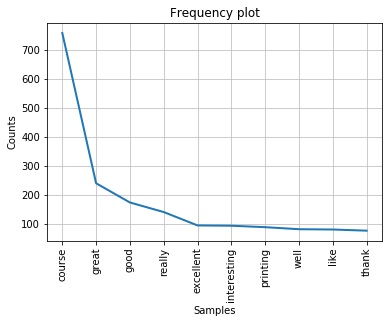

In [33]:
def plot(freqD,max_num=None,cumulative=False,title='Frequency plot',linewidth=2):

    tmp = freqD.copy()

    norm = freqD.N()

    for key in tmp.keys():

        #tmp[key] = float(freqD[key]) / norm

        tmp[key] = float(freqD[key])

    if max_num:

        tmp.plot(max_num, cumulative=cumulative,

                 title=title, linewidth=linewidth)

    else:

        tmp.plot(cumulative=cumulative, 

                 title=title, 

                 linewidth=linewidth)



    return

plot(dist,10)

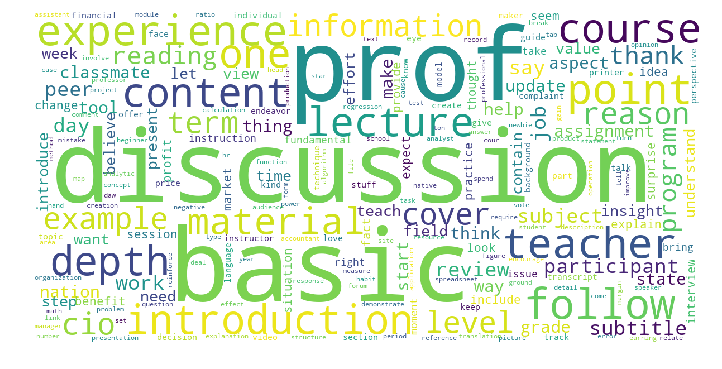

In [34]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords.words("english"),
        max_words=1000,
        max_font_size=60, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(2, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(lastString)

In [35]:
sia = SentimentIntensityAnalyzer()

listy = []

sentCounterP = 0
sentCounterN = 0
ss = sia.polarity_scores("bad idea")
listy.append(ss)
print(ss)

{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}


In [36]:
listy = []

sentCounterP = 0
sentCounterN = 0
for qq in range(1000):
    ss = sia.polarity_scores(comments["Review"][qq])
    listy.append(ss)
    #print(comments["Review"][qq])
    #print(ss)
    #print("negative",ss['neg'])
    #print("positive",ss['pos'])
    
    #comments.insert(3,'labelSentiment',"")
    #comments.insert(4,'sentimentGuess',"")
    
    n_ = ("negative",ss['neg'])
    p_ = ("positive",ss['pos'])
    
    if(n_[1]>p_[1]):
        comments["sentimentGuess"][qq] = 0
        sentCounterN = sentCounterN+1 
        #print("negative")
    else:
        comments["sentimentGuess"][qq] = 1
        sentCounterP = sentCounterP+1
        #print("positive")

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [37]:
labelCounterP = 0
labelCounterN = 0
for zz in range(1000):
    temp = comments["Label"][zz]
    if temp == 1:
        comments["labelSentiment"][zz]=0
        labelCounterN = labelCounterN+1
    else: 
        comments["labelSentiment"][zz]=1
        labelCounterP = labelCounterP+1

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


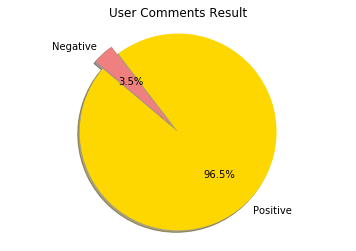

In [38]:
#### PIE CHART FOR LABELS SENTIMNENT
labels = 'Positive', 'Negative'
sizes = [labelCounterP, labelCounterN]
colors = ['gold','lightcoral']
explode = (0, 0.1)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.title('User Comments Result')
plt.axis('equal')
plt.show()

In [39]:
####PIE CHART FOR LABELS

labelCounter1 = 0
labelCounter2 = 0
labelCounter3 = 0
labelCounter4 = 0
labelCounter5 = 0
for zz in range(1000):
    temp = comments["Label"][zz]
    if temp == 1:
        
        labelCounter1 = labelCounter1+1
    elif temp==2: 
        
        labelCounter2 = labelCounter2+1
    elif temp==3: 
        
        labelCounter3 = labelCounter3+1
    elif temp==4: 
        
        labelCounter4 = labelCounter4+1
    elif temp==5: 
        
        labelCounter5 = labelCounter5+1
        
labels = '1','2','3','4',',5'
sizes = [labelCounter1, labelCounter2,labelCounter3,labelCounter4,labelCounter5]
colors = ['#ff4500','#fd5f00','gold','#98f706','#00baff']
explode = (0, 0, 0, 0, 0)

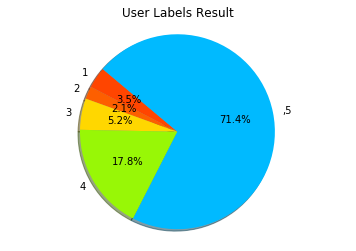

In [40]:
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.title('User Labels Result')
plt.axis('equal')
plt.show()

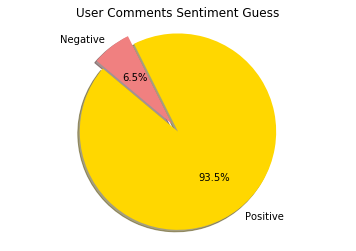

In [41]:
#######PIE CHART FOR SENTIMENT
labels = 'Positive', 'Negative'
sizes = [sentCounterP, sentCounterN]
colors = ['gold','lightcoral']
explode = (0, 0.1)  
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.title('User Comments Sentiment Guess')
plt.axis('equal')
plt.show()


In [42]:
#########SENTIMENT FOR WORDS

listy_ = []
negativeWords = []
positiveWords = []

for j in range(len(dataList)):
     ssWord = sia.polarity_scores(dataList[j])
     listy_.append(ssWord)
     
     wN_ = ("negative",ssWord['neg'])
     wP_ = ("positive",ssWord['pos'])
    
     if(wN_[1]>wP_[1]):
        negativeWords.append(dataList[j])
         
        #print("negative")
     else:
        positiveWords.append(dataList[j])

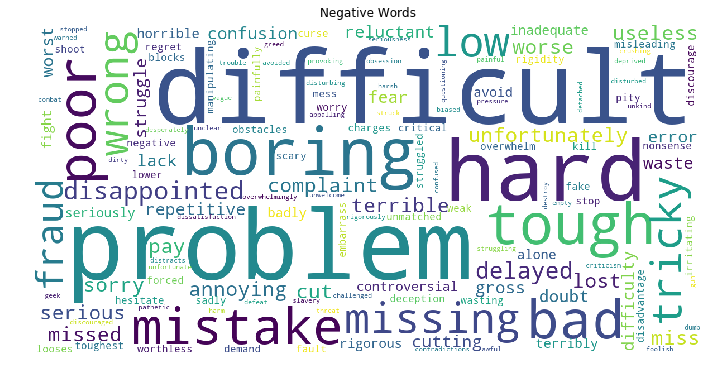

In [43]:
negativeWordsString = " ".join(negativeWords)

def show_wordcloud_negative_words(data):
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords.words("english"),
        max_words=1000,
        max_font_size=60, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(2, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.title("Negative Words")
    plt.show()
    
show_wordcloud_negative_words(negativeWordsString)

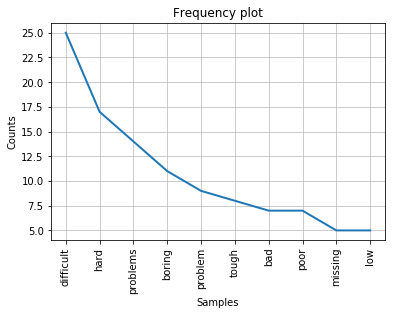

In [44]:
distNegativeWords = FreqDist(negativeWords)

def plotPNegativeeWords(freqD,max_num=None,cumulative=False,title='Frequency plot',linewidth=2):

    tmp = freqD.copy()

    norm = freqD.N()

    for key in tmp.keys():

        #tmp[key] = float(freqD[key]) / norm

        tmp[key] = float(freqD[key])

    if max_num:

        tmp.plot(max_num, cumulative=cumulative,

                 title=title, linewidth=linewidth)

    else:

        tmp.plot(cumulative=cumulative, 

                 title=title, 

                 linewidth=linewidth)



    return

plot(distNegativeWords,10)

In [45]:
###FREQUENCY of NEGATIVE WORDS
dist_ = FreqDist(negativeWords)

frequentListNegativeWords = mostFrequent(dist_,10)

In [46]:
print("\n\n===============frequentList===============")

print(frequentListNegativeWords)



===============frequentList===============
[('difficult', 25), ('hard', 17), ('problems', 14), ('boring', 11), ('problem', 9), ('tough', 8), ('bad', 7), ('poor', 7), ('missing', 5), ('low', 5)]


In [47]:
 #############   BoW  #############

from sklearn.model_selection import train_test_split      
    
X_train, X_test, y_train, y_test = train_test_split(comments['Review'][:1000].values,
                            comments['Label'][:1000].values,test_size=0.3)    
    

import spacy,string

re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [48]:
###Vectorizing
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer=tokenize)
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
####### NAIVE BAYES

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


naive = MultinomialNB()
classifier = naive.fit(tf_train,y_train)
y_pred = classifier.predict(tf_test)
print(classification_report(y_test, y_pred))
accuracy = (y_pred == y_test).mean()
print("Accuracy: ",accuracy)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       1.00      0.07      0.13        14
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        14
           4       0.20      0.05      0.08        56
           5       0.73      0.99      0.84       210

   micro avg       0.71      0.71      0.71       300
   macro avg       0.39      0.22      0.21       300
weighted avg       0.60      0.71      0.61       300

Accuracy:  0.7066666666666667


In [51]:
######## LOGISTIC REGRESSION

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 


LogReg = LogisticRegression()
LogReg.fit(tf_train, y_train)

y_pred = LogReg.predict(tf_test)
print(classification_report(y_test, y_pred))
accuracy = (y_pred == y_test).mean()
print("Accuracy: ",accuracy)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       1.00      0.14      0.25        14
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        14
           4       0.36      0.27      0.31        56
           5       0.78      0.93      0.85       210

   micro avg       0.71      0.71      0.71       300
   macro avg       0.43      0.27      0.28       300
weighted avg       0.66      0.71      0.66       300

Accuracy:  0.71


In [52]:
#########   KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(tf_train, y_train)
y_pred = classifier.predict(tf_test)
print(classification_report(y_test, y_pred))
accuracy = (y_pred == y_test).mean()
print("Accuracy: ",accuracy)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        14
           4       0.12      0.04      0.05        56
           5       0.71      0.95      0.81       210

   micro avg       0.67      0.67      0.67       300
   macro avg       0.16      0.20      0.17       300
weighted avg       0.52      0.67      0.58       300

Accuracy:  0.6733333333333333


In [53]:
#######     SVM

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(tf_train, y_train)
y_pred = classifier.predict(tf_test)
print(classification_report(y_test, y_pred))
accuracy = (y_pred == y_test).mean()
print("Accuracy: ",accuracy)


              precision    recall  f1-score   support

           1       0.43      0.21      0.29        14
           2       0.00      0.00      0.00         6
           3       0.18      0.21      0.19        14
           4       0.29      0.20      0.23        56
           5       0.78      0.86      0.82       210

   micro avg       0.66      0.66      0.66       300
   macro avg       0.34      0.30      0.31       300
weighted avg       0.63      0.66      0.64       300

Accuracy:  0.6566666666666666


In [54]:
#############   word embedding for sentimentGuess ##############


xTrain = comments.loc[:499,"Review"].values
yTrain = comments.loc[:499,"sentimentGuess"].values

xTest = comments.loc[500:999,"Review"].values
yTest = comments.loc[500:999,"sentimentGuess"].values


X = np.concatenate((xTrain, xTest), axis=0)
y = np.concatenate((yTrain, yTest), axis=0)

In [55]:
print(X.shape)
print(y.shape)

(1000,)
(1000,)


In [56]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

C:\Users\HP\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [57]:
tokenizer_obj = Tokenizer()
total_reviews = xTrain + xTest
tokenizer_obj.fit_on_texts(total_reviews)

max_length = max([len(s.split()) for s in total_reviews])

vocab_size = len(tokenizer_obj.word_index) + 1

xTrain_tokens = tokenizer_obj.texts_to_sequences(xTrain)
xTest_tokens = tokenizer_obj.texts_to_sequences(xTest)

xTrain_pad = pad_sequences(xTrain_tokens, maxlen=max_length, padding='post')
xTest_pad = pad_sequences(xTest_tokens, maxlen=max_length, padding='post')

In [58]:
print(vocab_size)

3567


In [59]:
EMBEDDING_DIM = 100 


Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length)


print("build model...")

build model...


In [60]:
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

print("train...")

model.fit(xTrain_pad, yTrain, batch_size=128, epochs=25, validation_data=(xTest_pad,yTest),verbose=2)

train...
Instructions for updating:
Use tf.cast instead.
Train on 500 samples, validate on 500 samples
Epoch 1/25
 - 8s - loss: 0.6929 - acc: 0.5100 - val_loss: 0.6561 - val_acc: 0.9260
Epoch 2/25
 - 8s - loss: 0.6346 - acc: 0.9440 - val_loss: 0.6027 - val_acc: 0.9260
Epoch 3/25
 - 8s - loss: 0.5790 - acc: 0.9440 - val_loss: 0.5470 - val_acc: 0.9260
Epoch 4/25
 - 8s - loss: 0.5160 - acc: 0.9440 - val_loss: 0.4862 - val_acc: 0.9260
Epoch 5/25
 - 9s - loss: 0.4492 - acc: 0.9440 - val_loss: 0.4201 - val_acc: 0.9260
Epoch 6/25
 - 9s - loss: 0.3793 - acc: 0.9440 - val_loss: 0.3533 - val_acc: 0.9260
Epoch 7/25
 - 9s - loss: 0.3111 - acc: 0.9440 - val_loss: 0.2970 - val_acc: 0.9260
Epoch 8/25
 - 8s - loss: 0.2507 - acc: 0.9440 - val_loss: 0.2663 - val_acc: 0.9260
Epoch 9/25
 - 8s - loss: 0.2221 - acc: 0.9440 - val_loss: 0.2690 - val_acc: 0.9260
Epoch 10/25
 - 9s - loss: 0.2259 - acc: 0.9440 - val_loss: 0.2846 - val_acc: 0.9260
Epoch 11/25
 - 9s - loss: 0.2331 - acc: 0.9440 - val_loss: 0.2925 

In [62]:
############# TESTING

print('Testing...')
score, acc = model.evaluate(xTest_pad, yTest, batch_size=128)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy: {0:.2%}".format(acc))

Testing...
500/500 [==============================] - ETA:  - ETA:  - ETA:  - 1s 3ms/step
Test score: 0.2670503752231598
Test accuracy: 0.9259999961853027
Accuracy: 92.60%


In [63]:
arraySamp = []

for i in range(100):
    arraySamp.append(comments["Review"][i])

test_samples_tokens = tokenizer_obj.texts_to_sequences(arraySamp)
test_samples_tokens_pad = pad_sequences(test_samples_tokens, maxlen=max_length)

#predict
model.predict(x=test_samples_tokens_pad)

array([[0.8360337 ],
       [0.6331782 ],
       [0.64798224],
       [0.64287454],
       [0.72734773],
       [0.6579541 ],
       [0.7206352 ],
       [0.6228179 ],
       [0.80522126],
       [0.6599678 ],
       [0.61080277],
       [0.78001595],
       [0.6343906 ],
       [0.62889606],
       [0.63018847],
       [0.6169312 ],
       [0.7161071 ],
       [0.7143888 ],
       [0.6427966 ],
       [0.59864557],
       [0.6896112 ],
       [0.6213038 ],
       [0.62473214],
       [0.71058965],
       [0.80777323],
       [0.6895211 ],
       [0.6778377 ],
       [0.74832505],
       [0.6560263 ],
       [0.6511388 ],
       [0.65678066],
       [0.70075047],
       [0.85480165],
       [0.9048086 ],
       [0.6173417 ],
       [0.710562  ],
       [0.67464626],
       [0.70118296],
       [0.63004136],
       [0.8422908 ],
       [0.6967095 ],
       [0.6116079 ],
       [0.6962537 ],
       [0.67257124],
       [0.60239774],
       [0.6421956 ],
       [0.8149748 ],
       [0.788

In [64]:
#let us check how the model predicts
classes = model.predict(xTest_pad[:100], batch_size=128)
for i in range(100):
    if(classes[i] > 0.5 and yTest[i] == 1 or (classes[i] <= 0.5 and yTest[i] == 0)):
        print( classes[i], yTest[i], " Right prediction")
    else:
        print( classes[i], yTest[i], " Wrong prediction")

[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 0  Wrong prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.9450954] 1  Right prediction
[0.94509